## Task_3_Explore_Unsupervised_Machine_Learning

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# importing libraries
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

### Preparing the data

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
data=pd.read_csv("iris.csv",names=names)
print("Data imported successfully")

data.head(10)  

Data imported successfully


,sepal-length,sepal-width,petal-length,petal-width,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
data['Species'].value_counts() #To know, into how many categories species are classified.

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Species             1
Name: Species, dtype: int64

In [4]:
iris_data=data.values
X=iris_data[1:,0:4]
Y=iris_data[1:,4] 

## K Means Clustering

### Using Elbow Method to find optimal number of Clusters


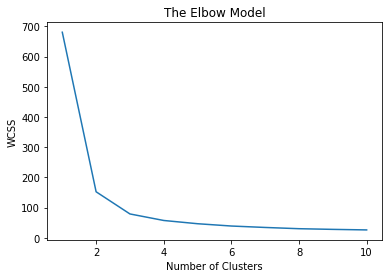

In [5]:
from sklearn.cluster import KMeans
wcss = []  #Within Cluster Sum Square
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#Plotting the Result
plt.plot(range(1,11), wcss)
plt.title('The Elbow Model')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

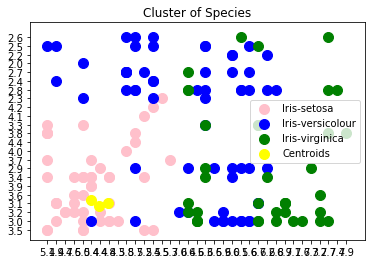

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=None)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Species')
plt.legend()
plt.show()

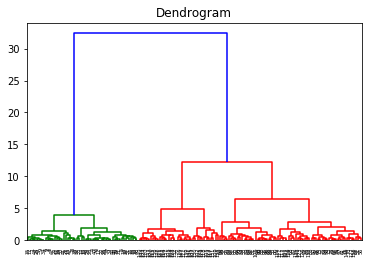

In [7]:
import scipy.cluster.hierarchy as sch
dd = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

